In [5]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [30]:
# Read and prepare data
df = pd.read_csv('data/entity_similarity.csv')
entities = pd.concat([df['entity1'], df['entity2']]).unique()
entities = ["create email template", "email template", "send rfqs", "sending rfqs", "custom quotation template", "design custom quotation template", "partial wholesale number", "wholesale partial number", "web store", "web store store", "build dashboard", "building dashboard", "configure multiple barcodes", "multiple barcodes", "exact wholesale number", "wholesale number", "quantity existing product", "quantity new product", "access key", "using access key"]

# Create embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(entities)

/Users/fahmisyaifudin/miniconda3/envs/llm/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [31]:
# PCA reduction and visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

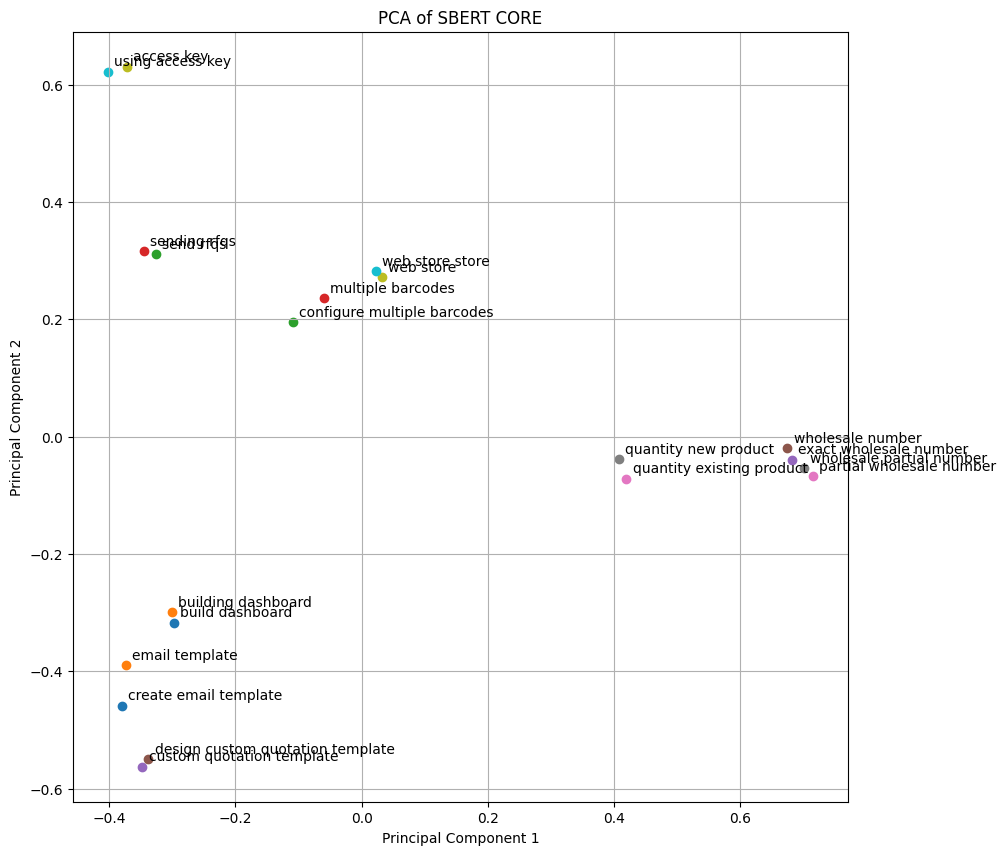

In [32]:
import matplotlib.pyplot as plt

# Plot the reduced embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(entities):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word)

plt.title('PCA of SBERT CORE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()